In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
column_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone',
                'breathes','enomous','fins','legs','tail','domestic','catsize']
column_names.append('Classification')

data = pd.read_csv("zoo.data", names = column_names) 
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,enomous,fins,legs,tail,domestic,catsize,Classification
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.dtypes

hair              int64
feathers          int64
eggs              int64
milk              int64
airborne          int64
aquatic           int64
predator          int64
toothed           int64
backbone          int64
breathes          int64
enomous           int64
fins              int64
legs              int64
tail              int64
domestic          int64
catsize           int64
Classification    int64
dtype: object

In [4]:
data['Classification'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [5]:
X = data.drop('Classification', axis=1)
y = data['Classification']

In [6]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse=False)
#y = encoder.fit_transform(y.values.reshape(-1,1))

In [7]:
X = np.array(X)
y = np.array(y)

# 10-Fold

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

num = 1
n = 0
precision = []
recall = []
accuracy = []
f1 = []


cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[train_idx],
                                                        y[train_idx],
                                                        test_size=0.25,
                                                        random_state=42)

    print(" ")
    print(f"Fold {num}:")
    print("_____________________________________________________________________________________________")
    
    clf = DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average=None)
    rec = metrics.recall_score(y_test, y_pred,average=None)
    score = metrics.f1_score(y_test, y_pred,average=None)
    
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)
    f1.append(score)
    
    print("Accuracy:",acc)
    print("y_true:", y_score)
    
    
    print(metrics.classification_report(y_test, y_pred))
    
    num = num+1
train_index = train_idx
test_index = test_idx

 
Fold 1:
_____________________________________________________________________________________________
Accuracy: 1.0
y_true: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

 
Fold 2:
_____________________________________________________________________________________________
Accuracy: 0.9565217391304348
y_true: 0.9565217391304348
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         2
    

In [10]:
avg_precision = np.sum(precision, axis=0)/len(precision)
#precision

ValueError: operands could not be broadcast together with shapes (6,) (7,) 

In [11]:
from statistics import mean
print(f'Average accuracy of 10-folds: {round(mean(accuracy), 2)}')
print(f'Average precision of 10-folds: {round(mean(precision), 2)}')
print(f'Average recall of 10-folds: {round(mean(recall), 2)}')
print(f'Average F1 score of 10-folds: {round(mean(f1), 2)}')

Average accuracy of 10-folds: 0.94


TypeError: can't convert type 'ndarray' to numerator/denominator

# Values of final fold values displayed

In [12]:
X_train_final = X[train_index]
y_train_final = y[train_index]
X_test_final = X[test_index]
y_test_final = y[test_index]

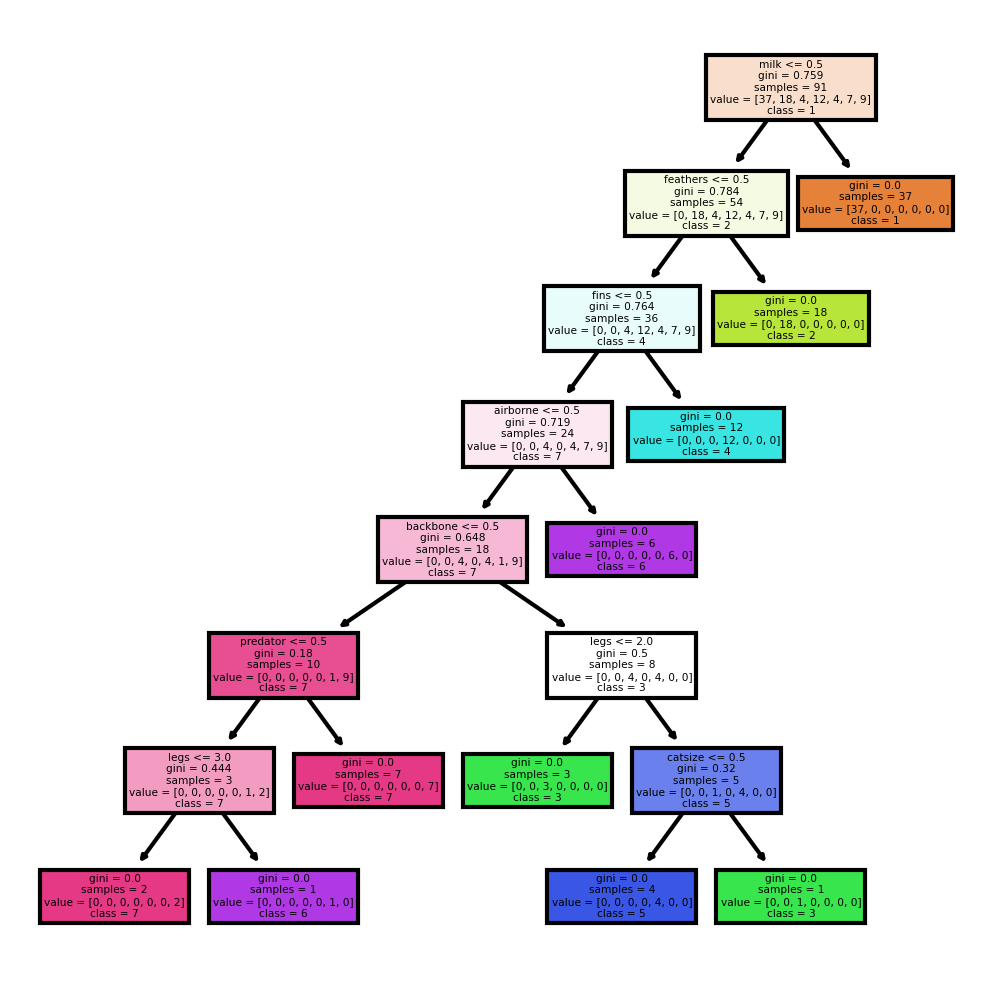

In [13]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_final, y_train_final)
y_pred_final = clf.predict(X_test_final)

fn = column_names
cn = ['1','2','3','4','5','6','7']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

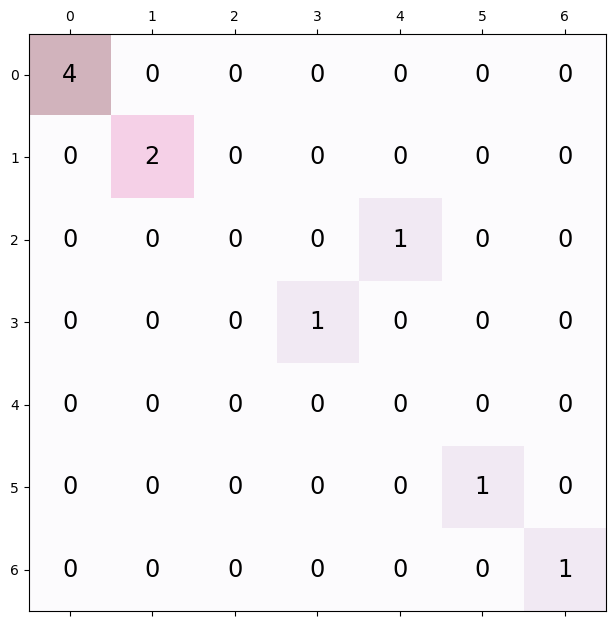

In [14]:
conf_matrix = metrics.confusion_matrix(y_test_final, y_pred_final)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap= 'PuRd', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')